## Lights, Camera, Data! Exploring The IMDb Movie Datasets

![IMDb Logo](IMDB.png)

Lights, camera, data! Dive into the fascinating world of movies as you embark on a journey to uncover the relationship between IMDb ratings and movie genres. In this project, you'll analyze two datasets—`imdb.csv` and `movies.csv`—to discover intriguing insights about what makes certain genres more popular among audiences.

## The Data

You have access to two datasets:

### **imdb.csv**
| Column         | Description                            |
|----------------|----------------------------------------|
| `id`           | Unique ID of the movie                 |
| `Poster_Link`  | Poster Link of Movie                   |
| `Certificate`  | Certificate of the Movie               |
| `IMDB_Rating`  | IMBD Rating of the Movie               |
| `Meta_score`   | Metascore earned by the Movie          |
| `Star1`        | First Star Cast                        |
| `Star2`        | Second Star Cast                       |
| `Star3`        | Third Star Cast                        |
| `Star4`        | Fourth Star Cast                       |
| `No_of_Votes`  | Number of Votes                        |
| `Gross`        | Gross earnings of the Movie            |

### **movies.csv**
| Column          | Description                           |
|-----------------|---------------------------------------|
| `id`            | Unique ID of the movie                |
| `Series_Title`  | Name of the Movie                     |
| `Released_Year` | Released Year of the Movie            |
| `Runtime`       | Total Runtime of the Movie            |
| `Genre`         | Genre of the Movie                    |
| `Overview`      | Overview of the Movie                 |
| `Director`      | Name of the Director                  |

## The Challenge

Your task is to explore the relationship between IMDb ratings and movie genres. By merging the `imdb.csv` and `movies.csv` datasets based on the unique movie IDs, you'll analyze how different genres fare in terms of audience ratings and popularity.

## Your Tasks

1. Load both CSV files—`imdb.csv` and `movies.csv`—and merge them into a single DataFrame based on the common `id` column.
2. Explore the merged dataset to understand its structure and contents.
3. Analyze the distribution of IMDb ratings across different movie genres. Which genres tend to have higher ratings?
4. Investigate the relationship between movie runtime and IMDb ratings. Do longer movies receive higher ratings, or is there a different trend?
5. Identify the top-rated directors in each genre. Who are the filmmakers behind the most highly-rated movies in each genre?
6. Visualize your findings using appropriate plots and charts to present your insights effectively.
7. Based on your analysis, draw conclusions about the relationship between movie genres and IMDb ratings. Are there any trends or patterns that stand out?

**Ready, Set, Analyze!**

Now that you have your mission outlined, it's time to roll up your sleeves and dive into the data. As you explore, remember to keep an open mind and let the data guide your insights.

## Step 0: Importing the Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Loading the Data

### Task 1.1: Loading the IMDb Dataset

In [73]:
imdb_data = pd.read_csv("imbd.csv")

### Task 1.2: Loading the Movies Dataset

In [74]:
movies_data = pd.read_csv("movies.csv")

### Task 1.3: Merging the Datasets

In [75]:
data = imdb_data.merge(movies_data, on="id")

## Step 2: Exploring the Data

### Task 2.1: Displaying the First Few Rows of the Data

In [76]:
data.head()

,id,Poster_Link,Certificate,IMDB_Rating,Meta_score,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Series_Title,Released_Year,Runtime,Genre,Overview,Director
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,A,9.3,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",The Shawshank Redemption,1994,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,A,9.2,100.0,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",The Godfather,1972,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,UA,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",The Dark Knight,2008,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,A,9.0,90.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",The Godfather: Part II,1974,202 min,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,U,9.0,96.0,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",12 Angry Men,1957,96 min,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet


### Task 2.2: Checking for Missing Values

In [77]:
data.isna().any()

id               False
Poster_Link      False
Certificate       True
IMDB_Rating      False
Meta_score        True
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
Series_Title     False
Released_Year    False
Runtime          False
Genre            False
Overview         False
Director         False
dtype: bool

### Task 2.3: Checking the Data Types 

In [78]:
data.dtypes

id                 int64
Poster_Link       object
Certificate       object
IMDB_Rating      float64
Meta_score       float64
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Series_Title      object
Released_Year     object
Runtime           object
Genre             object
Overview          object
Director          object
dtype: object

### Task 2.4: Descriptive Statistics

In [79]:
data.describe()

,id,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,843.000000,1.000000e+03
mean,499.500000,7.949300,77.971530,2.736929e+05
std,288.819436,0.275491,12.376099,3.273727e+05
min,0.000000,7.600000,28.000000,2.508800e+04
25%,249.750000,7.700000,70.000000,5.552625e+04
50%,499.500000,7.900000,79.000000,1.385485e+05
75%,749.250000,8.100000,87.000000,3.741612e+05
max,999.000000,9.300000,100.000000,2.343110e+06


## Step 3: Analyzing the Distribution of IMDb Ratings by Genre

### Task 3.1: Identifying the Unique Genres

In [80]:
genres = list(data.Genre.unique())
genres[:5]

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Biography, Drama, History']

In [81]:
genres = [genre.split(', ') for genre in genres]
genres[:5]

[['Drama'],
 ['Crime', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Drama'],
 ['Biography', 'Drama', 'History']]

### Task 3.2: Calculating the Average IMDb Rating for Each Genre

In [82]:
avg_rating_genre = data.groupby("Genre")['IMDB_Rating'].mean()

In [83]:
data['genre_list'] = data.Genre.str.split(', ')

In [84]:
data['genre_list'][:5]

0                   [Drama]
1            [Crime, Drama]
2    [Action, Crime, Drama]
3            [Crime, Drama]
4            [Crime, Drama]
Name: genre_list, dtype: object

In [85]:
genres_indx = {}

for idx, genres in enumerate(data['genre_list']):
    for genre in genres:
        if genre not in genres_indx:
            genres_indx[genre] = []
        genres_indx[genre].append(idx)

In [86]:
genres_ratings = {}
for key, indexes in genres_indx.items():
    rows = data.loc[indexes]
    genres_ratings[key] = round(rows['IMDB_Rating'].mean(), 2)

In [87]:
genres_ratings

{'Drama': 7.96,
 'Crime': 7.95,
 'Action': 7.95,
 'Adventure': 7.95,
 'Biography': 7.94,
 'History': 7.95,
 'Sci-Fi': 7.98,
 'Romance': 7.93,
 'Western': 8.0,
 'Fantasy': 7.93,
 'Comedy': 7.9,
 'Thriller': 7.91,
 'Animation': 7.93,
 'Family': 7.91,
 'War': 8.01,
 'Mystery': 7.97,
 'Music': 7.91,
 'Horror': 7.89,
 'Musical': 7.95,
 'Film-Noir': 7.99,
 'Sport': 7.93}

### Task 3.3: Visualizing the Average IMDb Ratings by Genre

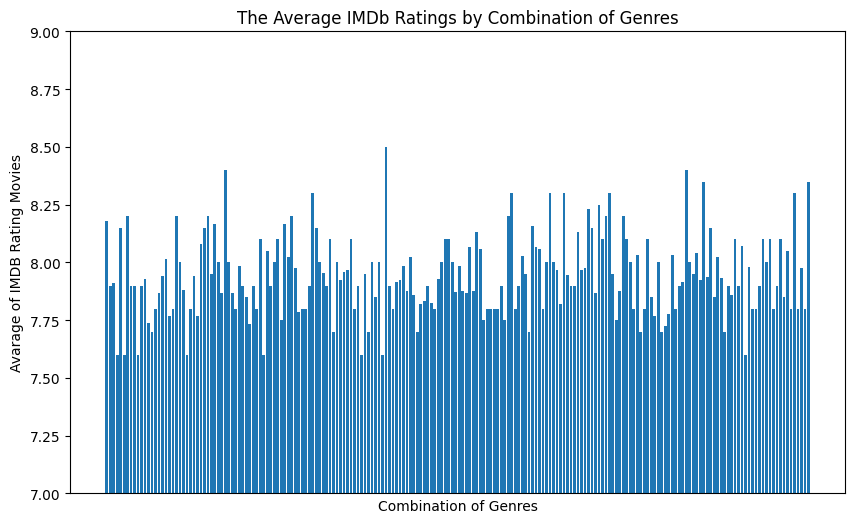

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(10, 6))

plt.bar(avg_rating_genre.index, avg_rating_genre)
plt.xticks([])
plt.ylim(7,9)
plt.title("The Average IMDb Ratings by Combination of Genres")
plt.xlabel("Combination of Genres")
plt.ylabel("Avarage of IMDB Rating Movies")

plt.show()
plt.clf()

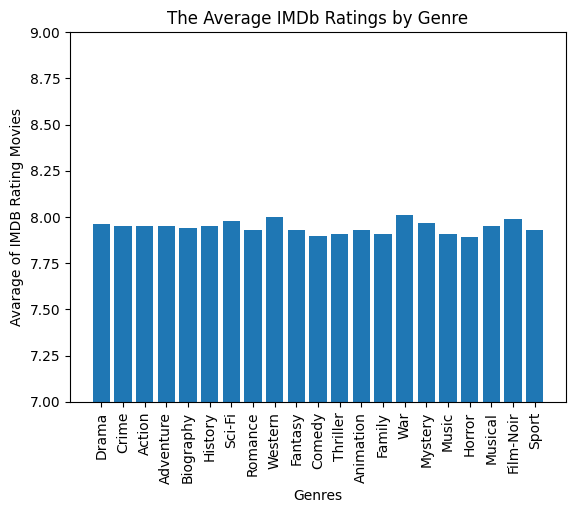

<Figure size 640x480 with 0 Axes>

In [89]:
plt.bar(list(genres_ratings.keys()), list(genres_ratings.values()))
plt.ylim(7,9)
plt.xticks(rotation=90)
plt.title("The Average IMDb Ratings by Genre")
plt.xlabel("Genres")
plt.ylabel("Avarage of IMDB Rating Movies")

plt.show()
plt.clf()

## Step 4: Investigating the Relationship Between Movie Runtime and IMDb Ratings

### Task 4.1: Analyzing the Summary Statistics for Movie Runtime

In [90]:
data.Runtime.describe()

count        1000
unique        140
top       100 min
freq           23
Name: Runtime, dtype: object

### Task 4.2: Creating a Scatter Plot of Movie Runtime vs. IMDb Rating

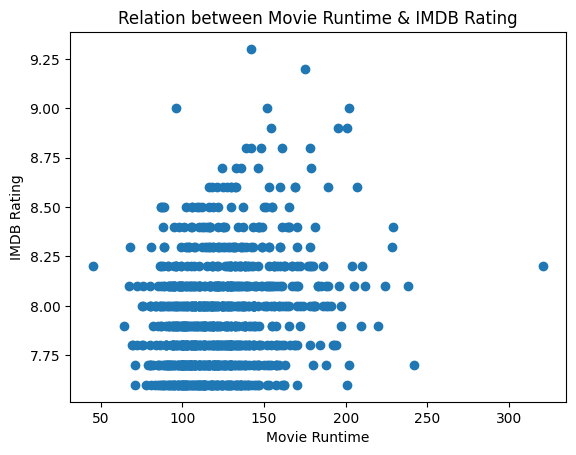

<Figure size 640x480 with 0 Axes>

In [91]:
runtime = [int(item.split(" ")[0]) for item in data["Runtime"]]
plt.scatter(runtime, data.IMDB_Rating)

plt.title("Relation between Movie Runtime & IMDB Rating")
plt.xlabel("Movie Runtime")
plt.ylabel("IMDB Rating")

plt.show()
plt.clf()

## Step 5: Identifying the Top-Rated Directors in Each Genre

### Task 5.1: Extracting the Top Director for Each Genre

In [93]:
grouped = data.groupby("Genre")['Director'].value_counts()
top_director_combination_genre = {}

for genre, directors in grouped.groupby(level=0):
    top_director_combination_genre[genre] = []
    max_count = 0
    for director, count in directors.items():
        if count > max_count:
            max_count = count
            top_director_combination_genre[genre] = [{director[1]: max_count}]
        elif count == max_count:
            top_director_combination_genre[genre].append({director[1]: max_count})


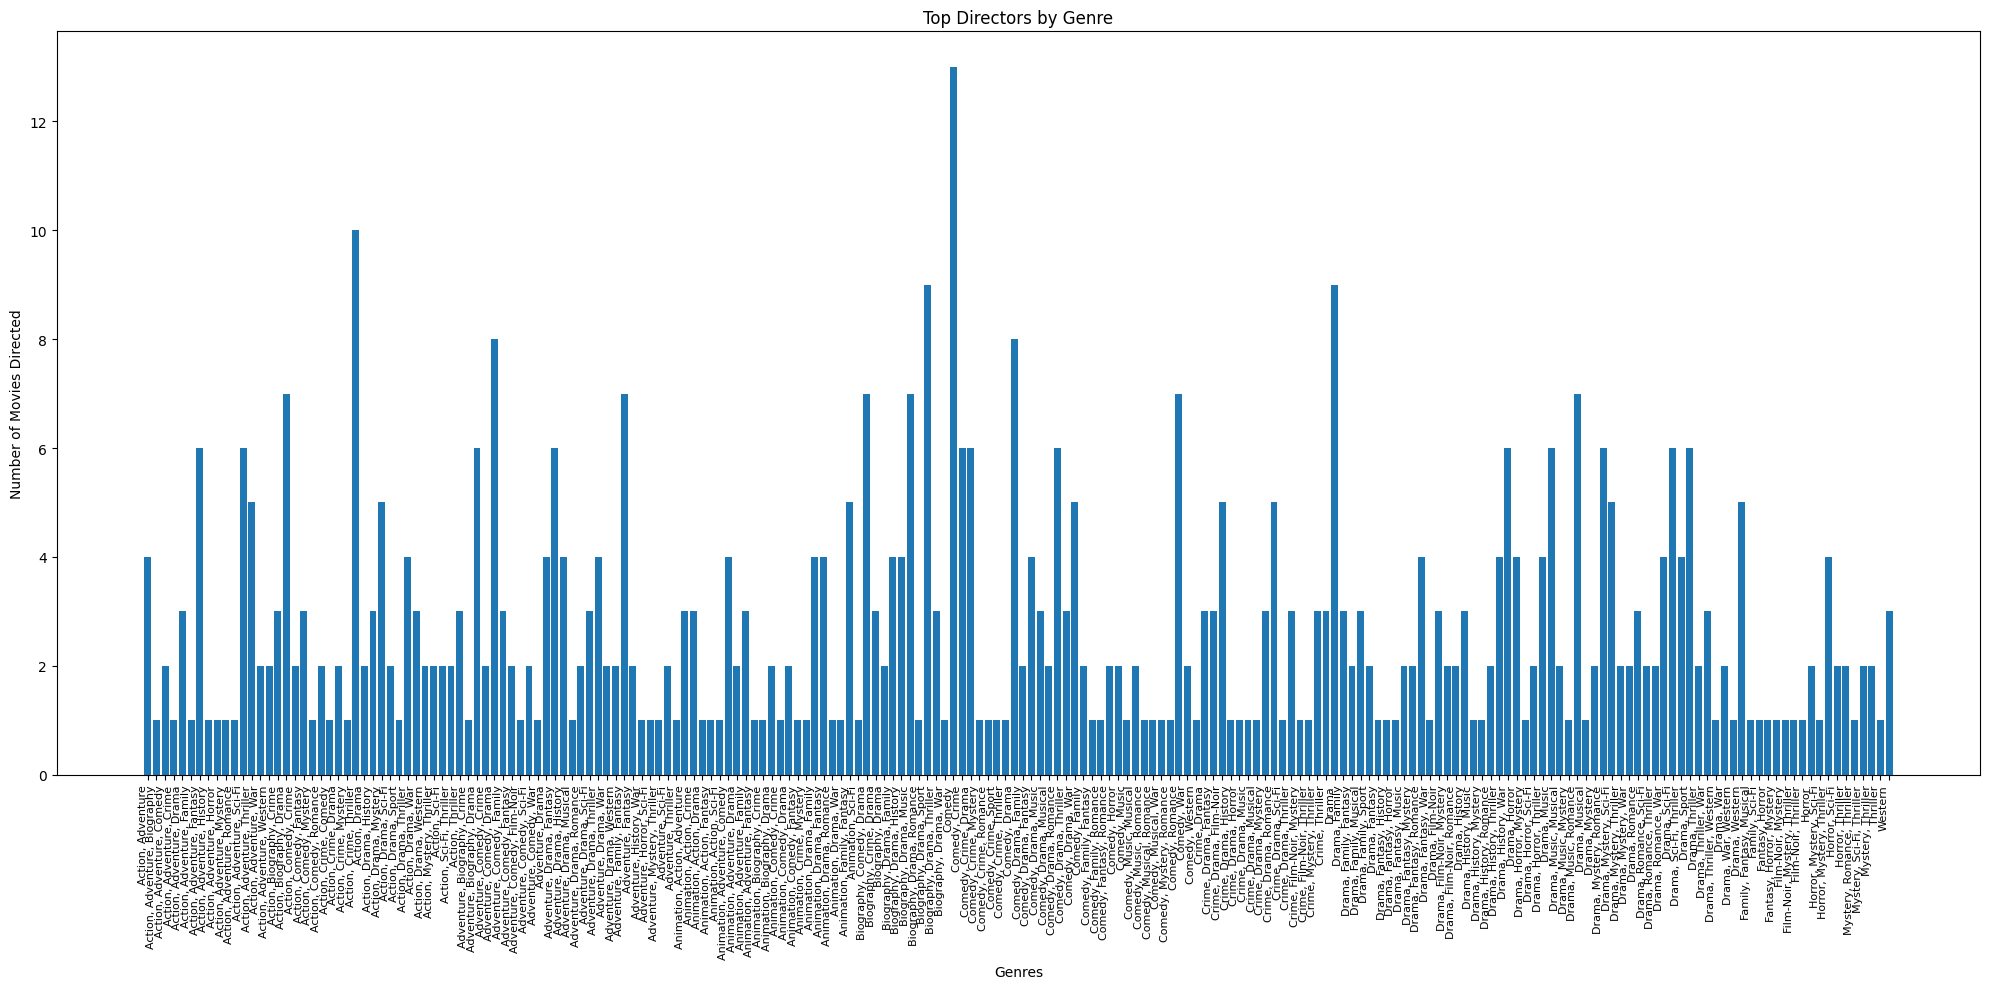

In [106]:
genres = list(top_director_combination_genre.keys())
director_counts = [
    sum(list(director.values())[0] for director in directors)
    for directors in top_director_combination_genre.values()
]
directors = [list(director.keys())[0] for directors in top_director_combination_genre.values() 
             for director in directors]

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(genres, director_counts)
plt.xlabel('Genres')
plt.ylabel('Number of Movies Directed')
plt.title('Top Directors by Genre')
plt.xticks(rotation=90, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

In [107]:
top_director_genre = {}

for genre, idxs in genres_indx.items():
    selected_rows = data.loc[idxs]
    director_counts = selected_rows['Director'].value_counts()
    top_director = director_counts.idxmax()
    top_director_count = director_counts.max()
    top_director_genre[genre] = (top_director, top_director_count)

top_director_genre

{'Drama': ('Martin Scorsese', 9),
 'Crime': ('Martin Scorsese', 8),
 'Action': ('Christopher Nolan', 5),
 'Adventure': ('Hayao Miyazaki', 9),
 'Biography': ('Ron Howard', 4),
 'History': ('Steven Spielberg', 3),
 'Sci-Fi': ('Christopher Nolan', 3),
 'Romance': ('Woody Allen', 5),
 'Western': ('Sergio Leone', 5),
 'Fantasy': ('Alfonso Cuarón', 2),
 'Comedy': ('Woody Allen', 8),
 'Thriller': ('Alfred Hitchcock', 9),
 'Animation': ('Hayao Miyazaki', 11),
 'Family': ('Hayao Miyazaki', 4),
 'War': ('David Lean', 2),
 'Mystery': ('Alfred Hitchcock', 9),
 'Music': ('Damien Chazelle', 2),
 'Horror': ('James Whale', 3),
 'Musical': ('Rajkumar Hirani', 2),
 'Film-Noir': ('Billy Wilder', 4),
 'Sport': ('Majid Majidi', 1)}

### Task 5.2: Counting the Occurrences of Top Directors by Genre

### Task 5.3: Visualizing the Top Directors by Genre

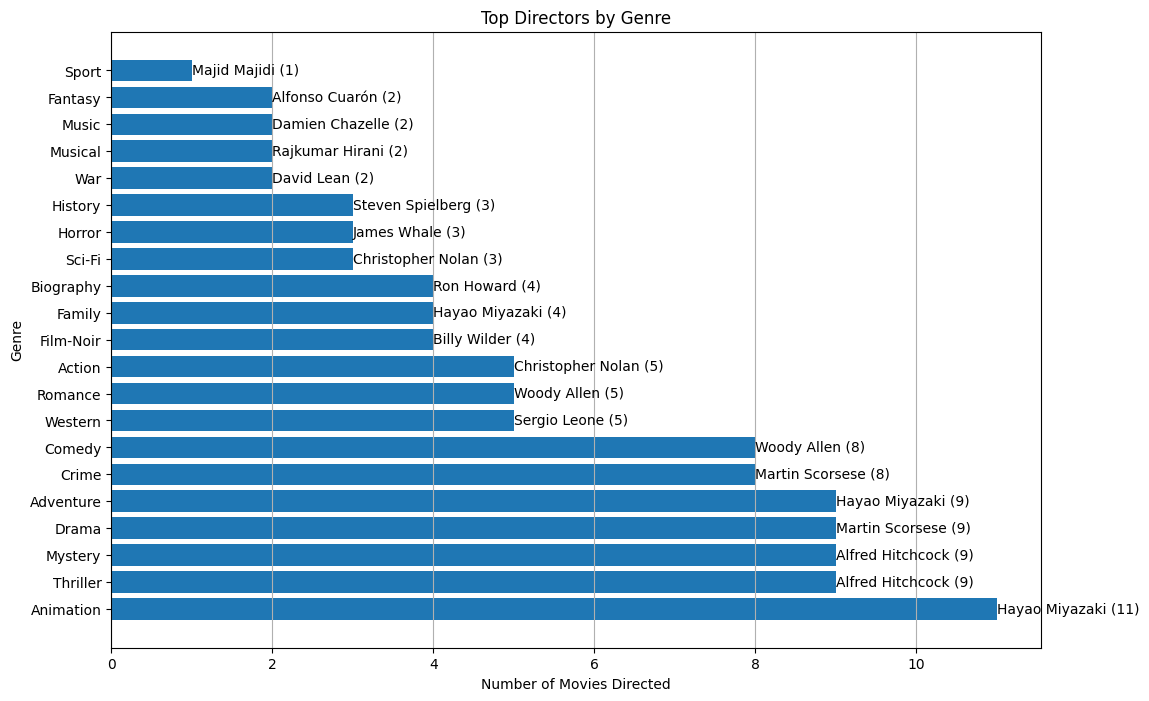

In [108]:
vs_genres = list(top_director_genre.keys())
vs_directors = [top_director_genre[genre][0] for genre in vs_genres]
vs_counts = [top_director_genre[genre][1] for genre in vs_genres]

sorted_data = sorted(zip(vs_counts, vs_genres, vs_directors), reverse=True)
sorted_counts, sorted_genres, sorted_directors = zip(*sorted_data)

plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_genres, sorted_counts)
plt.xlabel('Number of Movies Directed')
plt.ylabel('Genre')
plt.title('Top Directors by Genre')
plt.grid(axis='x')

for bar, director, count in zip(bars, sorted_directors, sorted_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{director} ({count})', 
             va='center', ha='left', color='black')

plt.show()

## Step 6: Drawing Conclusions

* Most movies with a runtime between 80 and 140 minutes have an IMDb rating between 7.0 and 8.5. Movies with an IMDb rating higher than 8.5 generally have a runtime between 100 and 200 minutes.
* The comedy genre boasts the highest average IMDb ratings among all genre combinations.
* Hayao Miyazaki is the most prolific director in Animation, directing 11 movies.
* Alfred Hitchcock stands out in the Mystery and Thriller genres, with 9 movies directed in each.

## Step 7: Exploring Additional Questions

### Question 1: How does the movie certificate (G, PG, PG-13, R, etc.) impact the IMDb ratings?

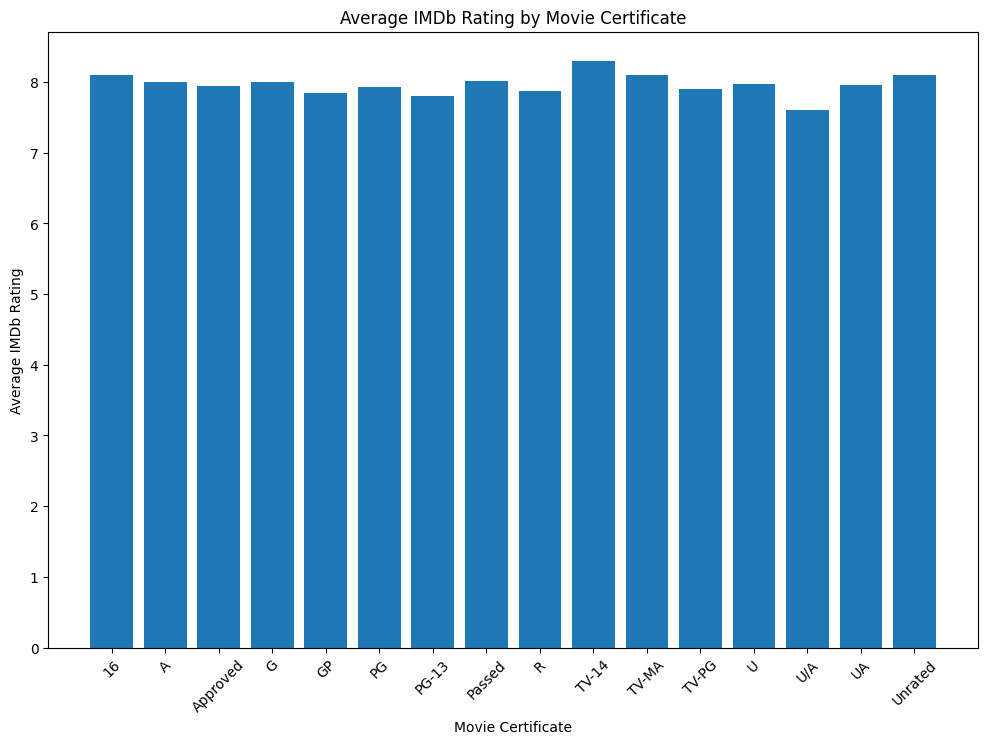

In [115]:
grouped_df = data.groupby('Certificate')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(grouped_df['Certificate'], grouped_df['IMDB_Rating'])
plt.xlabel('Movie Certificate')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Movie Certificate')
plt.xticks(rotation=45)
plt.show()

There are consistently high across different movie certificates, with no significant variation between them.

### Question 2: What is the relationship between the Metascore and IMDb ratings of movies?

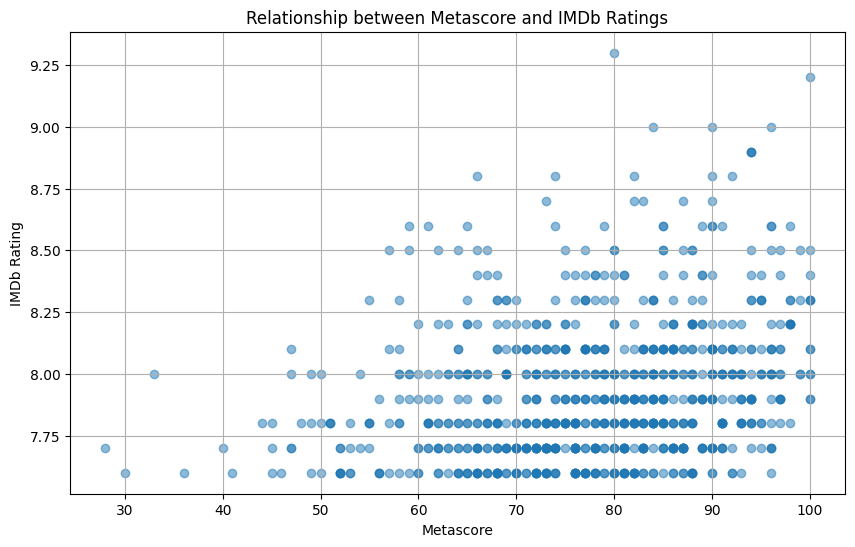

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Meta_score'], data['IMDB_Rating'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('IMDb Rating')
plt.title('Relationship between Metascore and IMDb Ratings')
plt.grid(True)
plt.show()

There is a general positive correlation between Metascore and IMDb ratings, with most movies clustering around mid-to-high scores in both metrics, though there are some notable outliers.

### Question 3: Are there any trends in the gross earnings of movies across different genres?